In [1]:
import os
import numpy as np 
print(os.path.exists("/mounts/Datasets1/ChallengeDeep/train/"))

train_path = "/mounts/Datasets1/ChallengeDeep/train/"

categories = np.sort(os.listdir(train_path))

True


In [2]:
category_paths = []

for category in categories :
    category_paths.append(os.path.join(train_path, category))

In [3]:
number_of_images = []
image_paths = {}
image_names = {}

for category_path, category in zip(category_paths, categories):
    number_of_images.append(len(os.listdir(category_path)))
    image_names[category] = np.sort(os.listdir(category_path))
    image_paths[category] = []
    for image in image_names[category]:
        image_paths[category].append(os.path.join(category_path, image))

In [4]:
print("Nombre moyen d'image par catégorie :", np.mean(number_of_images))
print("Nombre médian d'image par catégorie :", np.median(number_of_images))
print("Nombre max d'image par catégorie :", np.max(number_of_images))
print("Nombre min d'image par catégorie :", np.min(number_of_images))

print("Categories with more than 100000 images :", *np.array(categories)[np.array(number_of_images) > 100000])
print("Categories with less than 100 images :", *np.array(categories)[np.array(number_of_images) < 100])

Nombre moyen d'image par catégorie : 9946.441860465116
Nombre médian d'image par catégorie : 2036.5
Nombre max d'image par catégorie : 243570
Nombre min d'image par catégorie : 37
Categories with more than 100000 images : 001_detritus 036_Calanoida
Categories with less than 100 images : 023_Scyphozoa 024_Ctenophora 026_ephyra 079_gonophore__Abylopsis_tetragona


Les catégories ont généralement quelques milliers d'image mais cela varie énormément. Il faudra notamment porter beaucoup d'attention aux catégories avec moins de 100 images car ce sont celles que l'algo aura le plus de mal à prédire certainement. 
On a aussi 2 catégories avec plus de 100 000 images.

In [5]:
from PIL import Image

def afficher_image(categorie, numero_image, image_paths=image_paths):
    im = Image.open(image_paths[categories[categorie]][numero_image])
    im.show()
    print(image_paths[categories[categorie]][numero_image])


In [6]:
afficher_image(0, 1)

/mounts/Datasets1/ChallengeDeep/train/000_Candaciidae/1.jpg


In [7]:
image = Image.open(image_paths[categories[0]][5])
image.size

data = np.asarray(image)

print(np.product(data.shape))

print((data==255).sum())

27068
22760


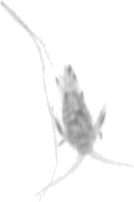

In [8]:
Image.fromarray(data)

In [9]:
data.shape

(202, 134)

In [99]:
(data + np.array([data != 255])[0]*(-80)).shape

(202, 134)

<class 'numpy.ndarray'>


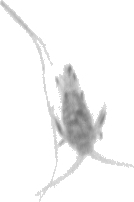

In [126]:
test = (data + np.array([data < 252])[0]*(-20))
print(type(test))
Image.fromarray(test.astype('uint8'))

In [27]:
import pandas as pd

test_path = "test/imgs"

df = pd.DataFrame()

df['imgname'] = os.listdir(test_path)
df['label'] = 1

df.to_csv('all_detritus_test.csv', index=False)
94946

df.shape

(94946, 2)